# Cardio Data Analysis

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
* Data
    * Libraries
    * Importing
    * Variables
    * Important Definitions
* Exploratory Data Analysis (EDA)
    * Plotting Objectives
    * Functions
    * Shape and Size
    * Types
    * Unique Values
    * Missing Values
    * Units Conversion
    * Numeric and Categorical Variables
        * Numeric Variables (both Continuous and Discrete)
            * Summary statistics
            * Probability Distribution
        * Categorical Variables
            * Bar Plots
* Feature Engineering
    * Units Conversion
    * Continuous Variables
        * Feature Scaling - Standardization (or Z-score Normalization)
        * Outliers Detection and Treatment
    * Categorical Variables
        * Label Encoding
* Feature Selection
    * Inferential Statistics and Hypothesis Testing
    * Feature Importance
    * Correlation Matrix Heatmap
* Model Training
* Model Evaluation
* Class Imbalance ?

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository - Cardio Data Analysis](https://github.com/caiocvelasco/health-data-analysis/blob/a4fafbcd8148a6d501f42a10ae9d313fc3b268e1/cardio-data-analysis-project.ipynb).

### Problem Definition

A client would like to understand some important patients' cardio-related descriptive statistics.

### Objective
Our goal is to calculate some descriptive statistics using Numpy, a package for scientific computing in Python.

## Data
Data was already available on a _csv_ format.

### Libraries

In [676]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # for data visualization
# import matplotlib as mpl
import seaborn as sns            # for data visualization

### Importing

In [677]:
# Basic Settings
csv_folder_name = "health_dataset"  # please, change the folder name (where the CSV files are stored) if need be
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save cvs Data on a Pandas Dataframe
df = pd.read_csv("cardio_base.csv", sep = ",", skipinitialspace = True) #skip space after delimiter if need be

# Save a Copy of the Dataframe
data = df.copy()

# Dataset Manipulation
data.name = "Cardio Base Dataset" # rename the dataset 
cols = data.columns;              # create an index list with feature names

# Quick Overview of a Sample from the Data
pd.set_option("display.max_columns", None) # changing the max_columns value
data.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
71,96,21874,2,179,95.0,150,90,1,0
39686,56708,22087,2,162,64.0,130,90,1,0
39847,56954,18157,1,155,68.0,120,80,1,0
44653,63776,16937,2,170,70.0,120,80,1,0
24532,35030,16586,2,171,95.0,140,90,1,0


### Important Definitions

Variables may be classified into two main categories: **Numeric** or **Categorical**.

#### Numeric (or Quantitative) variables
A numeric variable is a quantifiable characteristic whose values are numbers (except numbers which are codes standing up for categories). 
* Note: Numeric variables may be either **Continuous** or **Discrete**.

**[Definition]** Continuous variables: Those related to real numbers in mathematics (e.g.: 1.034), which brings the mathematical nature of uncountable infinity, i.e., "an infinite amount of numbers". It is usually expressed as float64 in computer science and is connected the idea of precision. Example: Height, which can be as precise as we want.

**[Definition]** Discrete variables: Those related to integer numbers in mathematics (e.g.: 34), which brings the mathematical nature of finiteness, i.e., "a fixed amount of numbers". It is usually expressed as int64 in computer science. Note that in this case, precision has no meaning. Example: Age, in which precision has no meaning.

#### Categorical (or Qualitative) variables
A Categorical variable refers to a characteristic that can’t be quantifiable.
* Note: Categorical variables can be either **Nominal** or **Ordinal**.

**[Definition]** Nominal variables: is one that describes a name, label or category without natural order. Example: Gender.

**[Definition]** Ordinal variables: An ordinal variable is a variable whose values are defined by an order relation between the different categories. Example: Rating System (excellent, good, bad).

### Variables

Let's take a closer look at the variables and their documentation.

| Feature                  | Variable Type (broad)  | Variable Type (specific) | Variable    | value type |
|:-------------------------|:-----------------------|:-------------------------|:------------|:-----------|
| Unique ID                | Categorical Variable   | Ordinal Variable         | id          | int
| Age                      | Numeric Variable       | Discrete Variable        | age         | int (days)
| Gender                   | Categorical Variable   | Nominal Variable         | gender      | int (binary)
| Height                   | Numeric Variable       | Continuous Variable      | height      | int (cm)
| Weight                   | Numeric Variable       | Continuous Variable      | weight      | float (kg)
| Systolic blood pressure  | Numeric Variable       | Continuous Variable      | ap_hi       | int
| Diastolic blood pressure | Numeric Variable       | Continuous Variable      | ap_lo       | int
| Cholesterol              | Categorical Variable   | Ordinal Variable         | cholesterol | int (1: normal, 2: above normal, 3: well above normal)
| Smoking                  | Categorical Variable   | Nominal Variable         | smoke       | int (binary)

In [678]:
# Store the relevant categorical variables for analysis on a list
cat_cols = ['gender', 'cholesterol', 'smoke']            


## Exploratory Data Analysis (EDA)

### Plotting Objectives
Before diving into the EDA, it is good to have a clear goal in mind. Our goal is to calculate some descriptive statistics.

Given our goal, the following points should help explore and visualize data accordingly:
 * Check features and their distributions, unidimensionally.
 * Check correlation between features, bidimensionally.

### Defining Functions for EDA

In [679]:
### DATA ANALYSIS PART ###

# Checking Shape
def data_shape(data):
    print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")

# Check Size
def data_size(data):
    print("This dataset has a total of: " + str(data.size) + " entries.")

# Check Information
def data_info(data):
    print(data.name)
    print("--------------------------------------")
    data.info()
    print("--------------------------------------")  
    
# Get Unique Values - Relevant Categorical Variables
def unique_values(data):                                      # define a function (output: unique values for categorical variables on the numeric format 'int')
    for i in cat_cols:                                        # cols is the list of features from this dataset defined in the section above
        print('Unique values in', i, 'are', data[i].unique()) # calls function unique() to find get unique values
        print('----------------------------------------------------------------------------------------------------')

# Check for Missing Values
def missing_values(data):
    print('Checking for missing values in the', data.name) # data.name has been defined previously in the "Importing" section
    print('------------------------------------------------------------')
    print(data.isna().sum())
    print('------------------------------------------------------------')

# Save Data - Numeric & Continuous Variables
def save_cont_data(data):
    cont_data = data.select_dtypes(include = ['float64'])
    return cont_data
    
# Save Data - Relevant Categorical Variable
def save_cat_data(data):
    cat_data = data[cat_cols]
    return cat_data

# IQR Method - Detecting Outliers
def iqr_method(potential_outliers, data): #arg 1 takes list of features with potential outliers, arg2 
    i = 1
    for col in potential_outliers:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f'column {i}: {data[col].name}\n------------------------')
        print('1st quantile => ',Q1)
        print('3rd quantile => ',Q3)
        print('IQR =>',IQR)

        lower_bound  = Q1-(1.5*IQR)
        print('lower_bound => ' + str(lower_bound))

        upper_bound = Q3+(1.5*IQR)
        print('upper_bound => ' + str(upper_bound))
        print("\n------------------------")
        
        i = i + 1

        data[col][((data[col] < lower_bound) | (data[col] > upper_bound))] = np.nan  # replacing outliers with NaN

# Outliers Method - For Height and Weight
def bound_method(data):
    for col in data:
        data[col][ (data[col] > data[col].quantile(0.975)) | (data[col] < data[col].quantile(0.025))] = np.nan  # replacing outliers with NaN


### VISUALIZATION PART ###

# Plot Probability Distributions - Continuous Variables
def pdf_plot_cont(cont_data):
    for i in cont_data:
        ax = sns.displot(cont_data[i], kind="kde")
        plt.show()

# Plot Bar Plots - Categorical Variables (and order by value_counts within them)
def bar_plot_cat(cat_data):
    plt.figure(figsize=(5,4))
    for i in cat_data:
        ax = sns.countplot(x = cat_data[i], order = cat_data[i].value_counts().index)
        plt.show()

# Plot Box Plots - Continuous Variables
def box_plot(cont_data): # the first argument takes a list of features and the second the dataset
    for i in cont_data:
        ax = sns.boxplot(x = cont_data[i], orient = 'h')
        plt.show()


### Shape and Size

In [680]:
# Check Shape and Size
data_shape(data) # calls shape function
data_size(data)  # calls size function

Dataset shape: 70000 observations and 9 features.
This dataset has a total of: 630000 entries.


### Types

In [681]:
# Check Data Type
data_info(data) # calls info function

Cardio Base Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB
--------------------------------------


All features have the expected type, but height, which should be interpreted as float.

Notice that all non-null counts are the same, so the dataset does not seem to have missing values. 

However, it is always good to check whether discrete variables have the expected values. These are: __gender, cholesterol, smoke__. 

For that, we will look into _Unique values_.

In [682]:
# Converting height, ap_hi, and ap_lo types from int to float
data['height'] = data['height'].astype('float64')
data['ap_hi'] = data['ap_hi'].astype('float64')
data['ap_lo'] = data['ap_lo'].astype('float64')

# Check new type for Height
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  float64
 6   ap_lo        70000 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.8 MB


### Unique Values
Let's take a closer look into the discrete variables.

In [683]:
# Check for unique values - Categorical Variables
unique_values(data) # calls unique values function

Unique values in gender are [2 1]
----------------------------------------------------------------------------------------------------
Unique values in cholesterol are [1 3 2]
----------------------------------------------------------------------------------------------------
Unique values in smoke are [0 1]
----------------------------------------------------------------------------------------------------


All indicator variables the expected values. There are no inconsistent values.

### Missing Values

In this dataset, there is no missing values in the N/A format.

In [684]:
# Check for missing values
missing_values(data) # calls missing values function

Checking for missing values in the Cardio Base Dataset
------------------------------------------------------------
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64
------------------------------------------------------------


### Units Conversion

Checking whether theer is a need for unit conversion in the given features.

The variable age is in days, so we need to convert it to years and round it down, as requested. The other variables are okay.

In [685]:
# Converting Age from days to years .apply(np.floor)
data['age_years_float'] = (data['age'] / 365)
data['age_years'] = (data['age'] / 365).apply(np.floor).astype(int)

# Quick overview of age conversion
print(data[['age', 'age_years_float', 'age_years']].sample(5))

# Drop unecessary feature
data = data.drop(columns='age_years_float')

# Quickly check new data
data.head()

         age  age_years_float  age_years
56671  22430        61.452055         61
66967  14684        40.230137         40
38550  23231        63.646575         63
45416  15413        42.227397         42
41306  20982        57.484932         57


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years
0,0,18393,2,168.0,62.0,110.0,80.0,1,0,50
1,1,20228,1,156.0,85.0,140.0,90.0,3,0,55
2,2,18857,1,165.0,64.0,130.0,70.0,3,0,51
3,3,17623,2,169.0,82.0,150.0,100.0,1,0,48
4,4,17474,1,156.0,56.0,100.0,60.0,1,0,47


### Numeric and Categorical Variables

In [686]:
# Save numeric dataset into a new dataset for later use
cont_data = save_cont_data(data) #calls save_cont_data function

# Quick Overview
cont_data.sample(5)

,height,weight,ap_hi,ap_lo
36541,161.0,74.0,160.0,80.0
54665,152.0,56.0,110.0,80.0
67647,172.0,59.0,110.0,80.0
22324,169.0,68.0,110.0,80.0
21476,155.0,80.0,130.0,90.0


In [687]:
# Save categorical dataset into a new dataset for later use
cat_data = save_cat_data(data)

# Quick Overview
cat_data.sample(5)

,gender,cholesterol,smoke
36049,1,1,0
68567,1,3,0
64949,2,1,1
67660,2,1,0
48083,1,2,0


### Numeric Variables

In this section, we will check whether the most important statistics makes sense. We'll check the max and min values. Moreover, we'll look into the summary statistics and check for outliers.

#### Summary Statistics

In [688]:
# Summary Statistics
cont_data.describe().T

,count,mean,std,min,25%,50%,75%,max
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


#### Probability Distributions

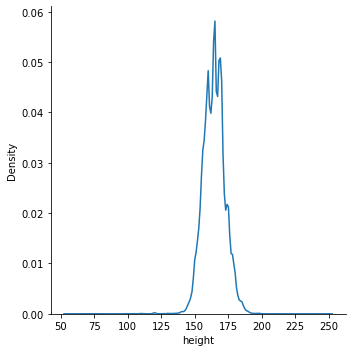

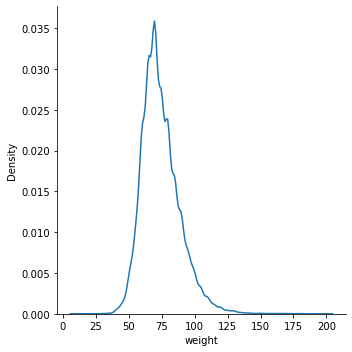

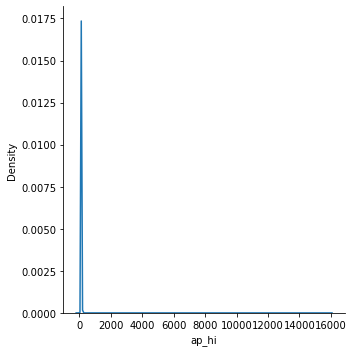

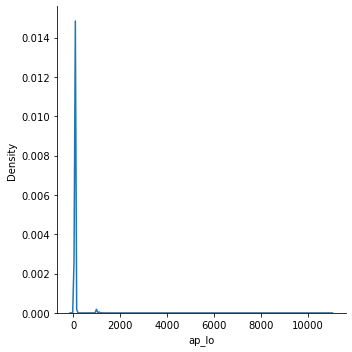

In [689]:
#### Probability Distributions (PDFs)
pdf_plot_cont(cont_data) # calls pdf plot function

Some features are strongly skewed to the right, let's focus on those. They are: **ap_hi, ap_lo**.

This information is important because it supports the methods we use for:
* Outliers Detection and Treatment

#### Outliers Detection and Treatment

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. We started by looking at the probability distribution of those features and we noticed their skewness, which might indicated possible candidate features for outliers. We also looked at the summary statistics which also show unexpected values.

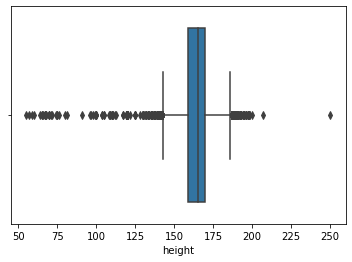

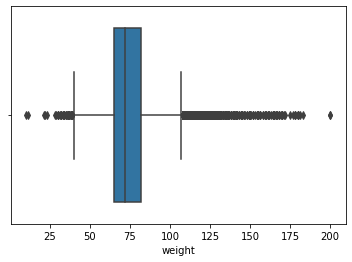

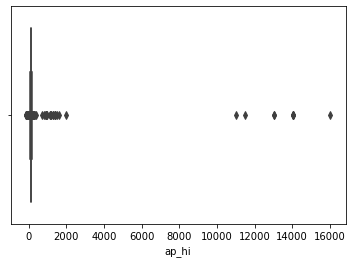

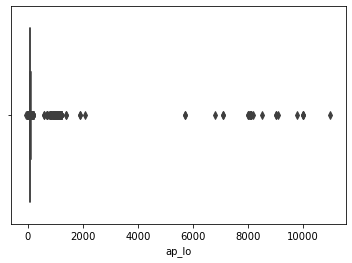

In [690]:
# Boxplots
box_plot(cont_data)

For Height and Weight, we will use intuition and remove those that fall below 2.5% or above 97.5% of a given range.

For Diastolic and Systolic, we will do the same but we will also correct the cases where diastolic pressure is higher than systolic (because this is not correct) and the cases where blood pressures is negative, which is also incorrect.

In [691]:
# Handling Outliers with a given range
bound_method(cont_data)

In [692]:
# Check new dataset with NaN as outliers
cont_data.describe().T  # describe() already excludes NaN values

,count,mean,std,min,25%,50%,75%,max
height,67024.0,164.404616,6.942338,150.0,159.0,165.0,169.0,180.0
weight,66897.0,73.715140,12.069034,51.0,65.0,72.0,81.0,108.0
ap_hi,67536.0,126.728412,14.855947,100.0,120.0,120.0,140.0,170.0
ap_lo,68085.0,81.028641,8.784395,60.0,80.0,80.0,90.0,100.0


In [693]:
# Check whether Diastolic > Systolic
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo'] > data['ap_hi']].shape[0]))


Diastilic pressure is higher than systolic one in 1234 cases


In [694]:
# Assign NaN values to ap_lo and ap_hi when this case is true
data['ap_lo'][ data['ap_lo'] > data['ap_hi'] ] = np.nan
data['ap_hi'][ data['ap_lo'] > data['ap_hi'] ] = np.nan

print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo'] > data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


### Categorical Variables

#### Box Plots

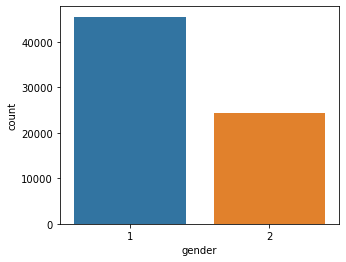

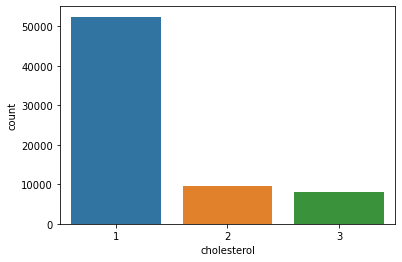

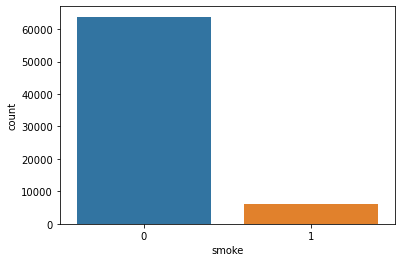

In [695]:
# Bar Plots for the Relevant Categorical Variables
bar_plot_cat(cat_data)